In [1]:
import pandas as pd

In [2]:
import urllib.request, json , time, os, difflib, itertools
import pandas as pd
from multiprocessing.dummy import Pool
from datetime import datetime
try:
    import httplib
except:
    import http.client as httplib
from tqdm.auto import tqdm


# query_url = 'https://finance.yahoo.com/lookup/equity?s=a&t=A&b=0&c=1'
# with urllib.request.urlopen(query_url) as url:
    # parsed = json.loads(url.read().decode())

In [3]:
import requests
requests.get('https://finance.yahoo.com/lookup/equity?s=a&t=A&b=0&c=1')

<Response [404]>

In [4]:
!pip install fake_headers

  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1271 sha256=61aa2f5e7a1e481a4a09f4c6e8821ef63625f87df65dcc3554e7cc0a17df0dd1
  Stored in directory: /Users/user/Library/Caches/pip/wheels/73/2b/cb/099980278a0c9a3e57ff1a89875ec07bfa0b6fcbebb9a8cad3
Successfully built bs4


In [5]:
from string import ascii_lowercase, digits
from fake_headers import Headers
import requests

In [6]:
ascii_lowercase + digits

'abcdefghijklmnopqrstuvwxyz0123456789'

In [7]:
headers = Headers(os="mac", headers=True).generate()
r = requests.get('https://finance.yahoo.com/lookup/equity?s=aaaa&t=A&b=0&c=10000', headers=headers)
try:
    temp = pd.read_html(r.text)[0]
except:
    print('Err')

In [8]:
from itertools import product
len(list(product(ascii_lowercase + digits, repeat=4)))

1679616

In [47]:
data = None
for letter in tqdm(ascii_lowercase + digits):
    headers = Headers(os="mac", headers=True).generate()
    r = requests.get('https://finance.yahoo.com/lookup/equity?s={}&t=A&b=0&c=10000'.format(letter), headers=headers)
    temp = pd.read_html(r.text)[0]
    if data is None:
        data = temp
    else:
        data = pd.concat([data, temp], axis=0)

In [48]:
data = data.drop_duplicates('Symbol')
data = data.reset_index(drop=True)
data

,Symbol,Name,Last Price,Industry / Category,Type,Exchange
0,AAPL,Apple Inc.,142.56,Technology,Stocks,NMS
1,AMZN,"Amazon.com, Inc.",2138.61,Consumer Cyclical,Stocks,NMS
2,RIVN,"Rivian Automotive, Inc.",24.30,Consumer Cyclical,Stocks,NMS
3,AMC,"AMC Entertainment Holdings, Inc",11.20,Communication Services,Stocks,NYQ
4,AMD,"Advanced Micro Devices, Inc.",87.06,Technology,Stocks,NMS
...,...,...,...,...,...,...
96613,MGU5.MU,MAGNUM AG GEN.99/UNB.,96.00,NaN,Stocks,MUN
96614,SRTRANSFIN-Z7.NS,Sec Red NCD 9.5% Sr.V,1072.00,NaN,Stocks,NSI
96615,SRTRANSFIN-Z3.NS,Sec Red NCD 9.12% Sr.I,1011.10,NaN,Stocks,NSI
96616,US65442R1095.SG,9F Inc. (ADRs),0.69,NaN,Stocks,STU


In [65]:
data[~data['Exchange'].isna()].groupby('Exchange').count()

,Symbol,Name,Last Price,Industry / Category,Type
Exchange,,,,,
AMS,281,281,281,128,281
AQS,102,102,102,96,102
ASE,260,260,248,214,260
ASX,1969,1969,1969,1887,1969
ATH,118,118,118,0,118
...,...,...,...,...,...
TOR,1161,1161,1161,1114,1161
TWO,850,850,850,794,850
VAN,1414,1414,1414,1402,1414


In [49]:
data[~data['Industry / Category'].isna()]

,Symbol,Name,Last Price,Industry / Category,Type,Exchange
0,AAPL,Apple Inc.,142.56,Technology,Stocks,NMS
1,AMZN,"Amazon.com, Inc.",2138.61,Consumer Cyclical,Stocks,NMS
2,RIVN,"Rivian Automotive, Inc.",24.30,Consumer Cyclical,Stocks,NMS
3,AMC,"AMC Entertainment Holdings, Inc",11.20,Communication Services,Stocks,NYQ
4,AMD,"Advanced Micro Devices, Inc.",87.06,Technology,Stocks,NMS
...,...,...,...,...,...,...
96605,1R9.MU,"PLASTIQ.V.LOI.INH.EO -,90",5.15,Consumer Cyclical,Stocks,MUN
96606,165.F,9F INC. ADR/1 CL.A,0.70,Technology,Stocks,FRA
96609,ENCA.F,"ENCE ENERGIA+CELUL.EO-,90",3.30,Basic Materials,Stocks,FRA
96611,ENCA.MU,"ENCE ENERGIA+CELUL.EO-,90",3.37,Basic Materials,Stocks,MUN


In [50]:
data.to_csv('all_stock.csv', index=False)

In [67]:
data = data.set_index('Symbol')
data.head()

,Name,Last Price,Industry / Category,Type,Exchange
Symbol,,,,,
AAPL,Apple Inc.,142.56,Technology,Stocks,NMS
AMZN,"Amazon.com, Inc.",2138.61,Consumer Cyclical,Stocks,NMS
RIVN,"Rivian Automotive, Inc.",24.30,Consumer Cyclical,Stocks,NMS
AMC,"AMC Entertainment Holdings, Inc",11.20,Communication Services,Stocks,NYQ
AMD,"Advanced Micro Devices, Inc.",87.06,Technology,Stocks,NMS


In [73]:
tickers = pd.read_csv('ticker_with_exh.csv')
tickers = tickers.sort_values('Ticker')
tickers = tickers.set_index('Ticker')
tickers.head()

,Name,TypeDisplay,exchange
Ticker,,,
000019.SZ,"Shenzhen Cereals Holdings Co., Ltd.",Stock,SZ
000020.SZ,"Shenzhen Zhongheng Huafa Co., Ltd.",Stock,SZ
000031.SZ,"Grandjoy Holdings Group Co., Ltd.",Stock,SZ
000037.SZ,"Shenzhen Nanshan Power Co., Ltd.",Stock,SZ
000046.SZ,"Oceanwide Holdings Co., Ltd.",Stock,SZ


In [74]:
tickers.shape

(24839, 3)

In [76]:
new_ticker = tickers.join(data[['Exchange']])
new_ticker

,Name,TypeDisplay,exchange,Exchange
Ticker,,,,
000019.SZ,"Shenzhen Cereals Holdings Co., Ltd.",Stock,SZ,SHZ
000020.SZ,"Shenzhen Zhongheng Huafa Co., Ltd.",Stock,SZ,SHZ
000031.SZ,"Grandjoy Holdings Group Co., Ltd.",Stock,SZ,NaN
000037.SZ,"Shenzhen Nanshan Power Co., Ltd.",Stock,SZ,SHZ
000046.SZ,"Oceanwide Holdings Co., Ltd.",Stock,SZ,SHZ
...,...,...,...,...
ZZF.F,"US AUTO PTS NETW. DL-,001",Stock,F,FRA
ZZG.BE,"INFO.SVCS GRP.INC.DL-,001",Stock,BE,BER
ZZG.F,"INFO.SVCS GRP.INC.DL-,001",Stock,F,FRA


In [29]:
data

NameError: name 'data' is not defined

In [79]:
new_ticker = new_ticker.reset_index()

In [91]:
translate = new_ticker[(~new_ticker['Exchange'].isna()) & (~new_ticker['exchange'].isna())].drop_duplicates(['exchange', 'Exchange'])
translate[translate['exchange'] == 'F']

,Ticker,Name,TypeDisplay,exchange,Exchange
614,013A.F,"JD.com, Inc.",Stock,F,FRA
6291,9942.F,"Joyfull Co., Ltd.",Stock,F,FKA


In [95]:
new_ticker[(new_ticker['exchange'] == 'F') & (new_ticker['Exchange'] != 'FRA') & (~new_ticker['Exchange'].isna())]

,Ticker,Name,TypeDisplay,exchange,Exchange
6291,9942.F,"Joyfull Co., Ltd.",Stock,F,FKA


In [98]:
new_ticker = new_ticker.drop(6291)

In [99]:
new_ticker[(new_ticker['exchange'] == 'F') & (new_ticker['Exchange'] != 'FRA') & (~new_ticker['Exchange'].isna())]

,Ticker,Name,TypeDisplay,exchange,Exchange


In [125]:
translate = new_ticker[(~new_ticker['Exchange'].isna()) & (~new_ticker['exchange'].isna())].drop_duplicates(['exchange', 'Exchange'])
translate_dict = dict(zip(list(translate.drop_duplicates('Exchange')['exchange']), list(translate.drop_duplicates('Exchange')['Exchange'])))

In [129]:
translate_dict['YHD'] = 'YHD'

In [142]:
import numpy as np
new_ticker['exchange'] = new_ticker['exchange'].map(translate_dict)

In [170]:
for i, row in tqdm(new_ticker.iterrows(), total=new_ticker.shape[0]):
    if not pd.isna(row['exchange']):
        continue
    print(1)
    if pd.isna(row['Exchange']):
        continue
    new_ticker.loc[i, 'exchange'] = row['Exchange']

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1



In [169]:
not pd.isna(row['exchange'])

False

In [171]:
new_ticker[(new_ticker['exchange'].isna()) & (~new_ticker['Exchange'].isna())]

,Ticker,Name,TypeDisplay,exchange,Exchange


In [174]:
new_ticker = new_ticker[~new_ticker['exchange'].isna()]

In [175]:
new_ticker

,Ticker,Name,TypeDisplay,exchange,Exchange
0,000019.SZ,"Shenzhen Cereals Holdings Co., Ltd.",Stock,SHZ,SHZ
1,000020.SZ,"Shenzhen Zhongheng Huafa Co., Ltd.",Stock,SHZ,SHZ
2,000031.SZ,"Grandjoy Holdings Group Co., Ltd.",Stock,SHZ,NaN
3,000037.SZ,"Shenzhen Nanshan Power Co., Ltd.",Stock,SHZ,SHZ
4,000046.SZ,"Oceanwide Holdings Co., Ltd.",Stock,SHZ,SHZ
...,...,...,...,...,...
24834,ZZF.F,"US AUTO PTS NETW. DL-,001",Stock,FRA,FRA
24835,ZZG.BE,"INFO.SVCS GRP.INC.DL-,001",Stock,BER,BER
24836,ZZG.F,"INFO.SVCS GRP.INC.DL-,001",Stock,FRA,FRA
24837,ZZMS.BE,COMMERZBK AG SPONS.ADR,Stock,BER,NaN


In [177]:
new_ticker.groupby('exchange').count()[['Ticker']]

,Ticker
exchange,
AMS,45
ASE,31
ASX,215
ATH,12
BER,2412
...,...
TOR,353
TWO,360
VAN,40


In [183]:
new_ticker.to_csv('new_ticker.csv', index=False)

In [1]:
import pandas as pd

new_ticker = pd.read_csv('new_ticker.csv')
new_ticker

,Ticker,Name,TypeDisplay,exchange,Exchange
0,000019.SZ,"Shenzhen Cereals Holdings Co., Ltd.",Stock,SHZ,SHZ
1,000020.SZ,"Shenzhen Zhongheng Huafa Co., Ltd.",Stock,SHZ,SHZ
2,000031.SZ,"Grandjoy Holdings Group Co., Ltd.",Stock,SHZ,NaN
3,000037.SZ,"Shenzhen Nanshan Power Co., Ltd.",Stock,SHZ,SHZ
4,000046.SZ,"Oceanwide Holdings Co., Ltd.",Stock,SHZ,SHZ
...,...,...,...,...,...
24490,ZZF.F,"US AUTO PTS NETW. DL-,001",Stock,FRA,FRA
24491,ZZG.BE,"INFO.SVCS GRP.INC.DL-,001",Stock,BER,BER
24492,ZZG.F,"INFO.SVCS GRP.INC.DL-,001",Stock,FRA,FRA
24493,ZZMS.BE,COMMERZBK AG SPONS.ADR,Stock,BER,NaN


In [30]:
data = pd.read_csv('all_stock.csv')
data.head()

,Symbol,Name,Last Price,Industry / Category,Type,Exchange
0,AAPL,Apple Inc.,142.56,Technology,Stocks,NMS
1,AMZN,"Amazon.com, Inc.",2138.61,Consumer Cyclical,Stocks,NMS
2,RIVN,"Rivian Automotive, Inc.",24.30,Consumer Cyclical,Stocks,NMS
3,AMC,"AMC Entertainment Holdings, Inc",11.20,Communication Services,Stocks,NYQ
4,AMD,"Advanced Micro Devices, Inc.",87.06,Technology,Stocks,NMS


In [35]:
data = data.set_index('Symbol')

In [32]:
new_ticker = new_ticker.set_index('Ticker')

In [47]:
[item for sublist in [[x] * t.loc[x, 'Name']for x in list(t.index)] for item in sublist]

['Basic Materials',
 'Basic Materials',
 'Basic Materials',
 'Basic Materials',
 'Basic Materials',
 'Basic Materials',
 'Basic Materials',
 'Basic Materials',
 'Basic Materials',
 'Basic Materials',
 'Basic Materials',
 'Basic Materials',
 'Basic Materials',
 'Basic Materials',
 'Basic Materials',
 'Basic Materials',
 'Basic Materials',
 'Basic Materials',
 'Basic Materials',
 'Basic Materials',
 'Basic Materials',
 'Basic Materials',
 'Basic Materials',
 'Basic Materials',
 'Basic Materials',
 'Basic Materials',
 'Basic Materials',
 'Basic Materials',
 'Basic Materials',
 'Basic Materials',
 'Basic Materials',
 'Basic Materials',
 'Basic Materials',
 'Basic Materials',
 'Basic Materials',
 'Basic Materials',
 'Basic Materials',
 'Basic Materials',
 'Basic Materials',
 'Basic Materials',
 'Basic Materials',
 'Basic Materials',
 'Basic Materials',
 'Basic Materials',
 'Basic Materials',
 'Basic Materials',
 'Basic Materials',
 'Basic Materials',
 'Basic Materials',
 'Basic Materials',


([<matplotlib.patches.Wedge at 0x7fafece80910>,
 [Text(1.0448099056358269, 0.3440527010288608, 'Basic Materials'),
  Text(0.7596711051964873, 0.7955500059264331, 'Communication Services'),
  Text(0.19142031797136963, 1.0832166273962656, 'Consumer Cyclical'),
  Text(-0.45852755669095174, 0.9998762322182813, 'Consumer Defensive'),
  Text(-0.7651790086331959, 0.7902538103338191, 'Energy'),
  Text(-1.0544686375547998, 0.31320263794119685, 'Financial Services'),
  Text(-0.9807024124095912, -0.4982196085001154, 'Healthcare'),
  Text(-0.19604899930742245, -1.0823884653259006, 'Industrials'),
  Text(0.5381371410492547, -0.9593791833385457, 'Real Estate'),
  Text(0.9448617081075669, -0.5632373856128968, 'Technology'),
  Text(1.0955531431974834, -0.09880946528604745, 'Utilities')])

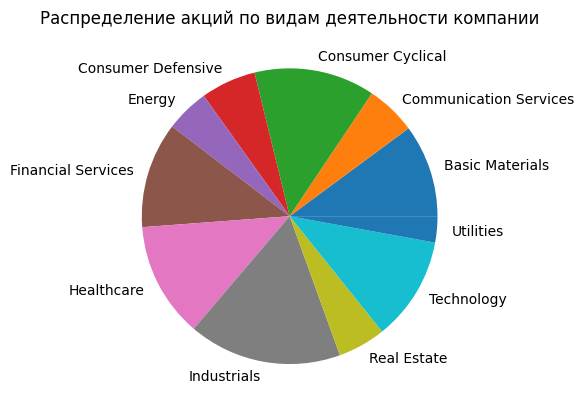

In [53]:
t = new_ticker.join(data[['Industry / Category']]).groupby('Industry / Category').count()[['Name']]
plt.style.use('default')
plt.title('Распределение акций по видам деятельности компании')
plt.pie(list(t['Name']), labels=list(t.index))

In [10]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'bright',
 'cjk-jp-font',
 'cjk-kr-font',
 'cjk-sc-font',
 'cjk-tc-font',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'grid',
 'high-contrast',
 'high-vis',
 'ieee',
 'latex-sans',
 'light',
 'muted',
 'nature',
 'no-latex',
 'notebook',
 'pgf',
 'retro',
 'sans',
 'scatter',
 'science',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'std-colors',
 'tableau-colorblind10',
 'vibrant']

In [4]:
import os

os.environ["PATH"] += os.pathsep + '/Library/TeX/texbin/'

In [28]:
new_ticker.groupby('exchange').count()[['Ticker']].sort_values('Ticker', ascending=False).head(20)

,Ticker
exchange,
FRA,3967
STU,3458
BER,2412
NYQ,1187
DUS,1052
BSE,1022
NSI,942
SHZ,762
MUN,748


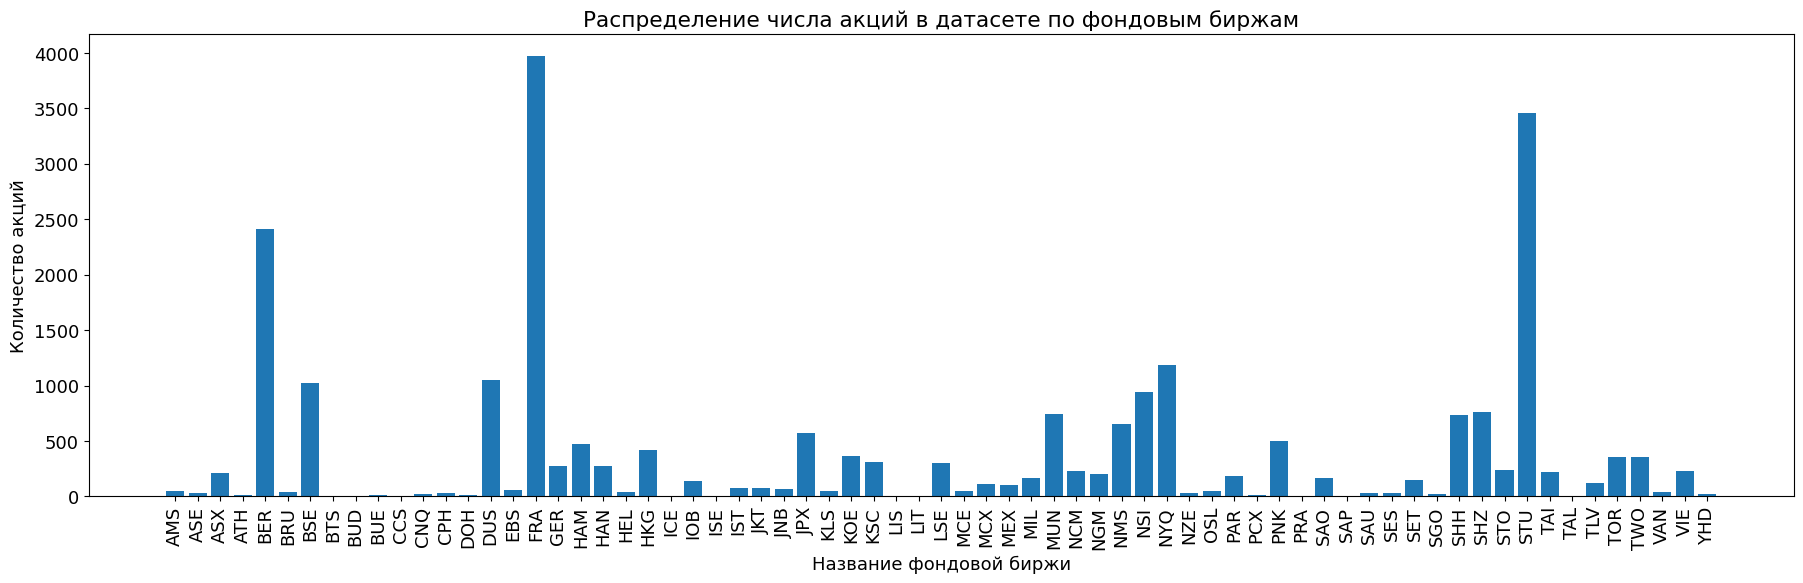

In [21]:
import matplotlib.pyplot as plt

plt.style.use('default')
plt.rcParams.update({'font.size': 13})

plt.figure(figsize=(22, 6))
plt.bar(list(new_ticker.groupby('exchange').count()[['Ticker']].index), list(new_ticker.groupby('exchange').count()[['Ticker']]['Ticker']))
plt.xticks(rotation=90)
plt.title('Распределение числа акций в датасете по фондовым биржам')
plt.xlabel('Название фондовой биржи')
plt.ylabel('Количество акций')
plt.show()


In [154]:
pd.isna(new_ticker.loc[11475, 'exchange'])

False

In [37]:
data.to_csv('all_stock.csv', index=False)

In [19]:
from fake_headers import Headers
from requests import get

headers = Headers(os="mac", headers=True).generate()

r = get('https://finance.yahoo.com/lookup/equity?s=b&t=A&b=0&c=10000', headers=headers)

In [21]:
from fake_headers import Headers
from requests import get

headers = Headers(os="mac", headers=True).generate()

r = get('https://finance.yahoo.com/lookup/equity?s=a&t=A&b=0&c=10000', headers=headers)

data_a = pd.read_html(r.text)[0]
data_a.head()

,Symbol,Name,Last Price,Industry / Category,Type,Exchange
0,AAPL,Apple Inc.,142.56,Technology,Stocks,NMS
1,AMZN,"Amazon.com, Inc.",2138.61,Consumer Cyclical,Stocks,NMS
2,RIVN,"Rivian Automotive, Inc.",24.30,Consumer Cyclical,Stocks,NMS
3,AMC,"AMC Entertainment Holdings, Inc",11.20,Communication Services,Stocks,NYQ
4,AMD,"Advanced Micro Devices, Inc.",87.06,Technology,Stocks,NMS


In [23]:
pd.concat([data_a, data_b], axis=0)

,Symbol,Name,Last Price,Industry / Category,Type,Exchange
0,AAPL,Apple Inc.,142.56,Technology,Stocks,NMS
1,AMZN,"Amazon.com, Inc.",2138.61,Consumer Cyclical,Stocks,NMS
2,RIVN,"Rivian Automotive, Inc.",24.30,Consumer Cyclical,Stocks,NMS
3,AMC,"AMC Entertainment Holdings, Inc",11.20,Communication Services,Stocks,NYQ
4,AMD,"Advanced Micro Devices, Inc.",87.06,Technology,Stocks,NMS
...,...,...,...,...,...,...
9995,OXOA.MU,"OXFORD BIOMEDICA LS-,50",5.60,Healthcare,Stocks,MUN
9996,BPE.MU,"BP PLC DZ/1 DL-,25",4.77,NaN,Stocks,MUN
9997,BH4.SG,Burgenland Holding AG,81.50,Utilities,Stocks,STU
9998,BK5.SG,BKS Bank AG,14.80,Financial Services,Stocks,STU


In [20]:
data_b = pd.read_html(r.text)[0]
data_b.head()

,Symbol,Name,Last Price,Industry / Category,Type,Exchange
0,U,Unity Software Inc.,35.09,Technology,Stocks,NYQ
1,BA,Boeing Company (The),123.14,Industrials,Stocks,NYQ
2,FB,"Meta Platforms, Inc.",191.24,Communication Services,Stocks,NMS
3,BYND,"Beyond Meat, Inc.",25.08,Consumer Defensive,Stocks,NMS
4,F,Ford Motor Company,12.44,Consumer Cyclical,Stocks,NYQ


In [10]:
headers = Headers(os="mac", headers=True).generate()
pd.read_html('https://finance.yahoo.com/lookup/equity?s=a&t=A&b=0&c=1', header=headers)

HTTPError: HTTP Error 404: Not Found

In [118]:
data[data['Exchange'] == 'MCX']

,Name,Last Price,Industry / Category,Type,Exchange
Symbol,,,,,
ALRS.ME,ALROSA PJSC,75.22,Basic Materials,Stocks,MCX
AFLT.ME,AEROFLOT PJSC,29.28,Industrials,Stocks,MCX
AKRN.ME,ACRON PJSC,18958.00,Basic Materials,Stocks,MCX
AGRO.ME,ROS AGRO PLC,896.40,Consumer Defensive,Stocks,MCX
RKKE.ME,ENERGIA ROCKET AND,6330.00,Industrials,Stocks,MCX
...,...,...,...,...,...
YRSBP.ME,TNS ENERGO YAROSAV,81.50,Utilities,Stocks,MCX
YKEN.ME,YAKUTSKENERGO PJSC,0.25,Utilities,Stocks,MCX
YRSB.ME,TNS ENERGO YAROSAV,170.00,Utilities,Stocks,MCX


In [121]:
new_ticker[new_ticker['Ticker'] == 'AKRN.ME']

,Ticker,Name,TypeDisplay,exchange,Exchange
6942,AKRN.ME,Public Joint Stock Company Acron,Stock,ME,MCX


In [122]:
train = pd.read_csv('train_stocks.csv')
train.head()

,Ticker,index,Date,extremum,-1,-2,-3,-4,-5,-6,...,-1256,-1257,-1258,-1259,-1260,-1261,-1262,-1263,-1264,-1265
0,000019.SZ,85,1993-02-08,0.271718,0.245001,0.232310,0.222291,0.226299,0.204925,0.171528,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,000019.SZ,469,1994-07-29,0.000000,0.001179,0.003832,0.005306,0.002653,0.001474,0.002064,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,000019.SZ,1156,1997-03-18,0.264635,0.240827,0.226871,0.226871,0.231633,0.228020,0.226050,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,000019.SZ,1650,1999-02-08,0.099479,0.102821,0.104492,0.105606,0.109505,0.105235,0.108577,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,000019.SZ,1925,2000-02-28,0.375500,0.359227,0.333765,0.300262,0.304090,0.315960,0.292029,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [123]:
train[train['Ticker'] == 'AKRN.ME']

,Ticker,index,Date,extremum,-1,-2,-3,-4,-5,-6,...,-1256,-1257,-1258,-1259,-1260,-1261,-1262,-1263,-1264,-1265
31150,AKRN.ME,56,2010-05-25,0.000000,0.003912,0.002362,0.004104,0.009009,0.011322,0.008694,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31151,AKRN.ME,709,2013-01-18,0.106685,0.101896,0.103232,0.102342,0.104346,0.101506,0.101206,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31152,AKRN.ME,904,2013-10-24,0.051009,0.051563,0.053939,0.055909,0.055971,0.055626,0.056389,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
